
1. Dataset Description

This dataset energy efficiency in buildings. Here's a breakdown of the features:

X1: Relative Compactness (Likely a measure of the building's shape, higher values mean more compact).

X2: Surface Area (Total exterior surface area of the building).

X3: Wall Area (Total area of the walls).

X4: Roof Area (Total area of the roof).

X5: Overall Height (Height of the building).

X6: Orientation (A categorical feature, likely representing the orientation of the building relative to the sun or cardinal directions).

X7: Glazing Area (The area of windows or glazed surfaces).

X8: Glazing Area Distribution (A categorical feature, likely describing how the glazing is distributed across the building's facades).

Y1: Heating Load (The amount of energy required to heat the building, our first target variable).

Y2: Cooling Load (The amount of energy required to cool the building, our second target variable).

In [1]:
import requests
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# General libraries
import numpy as np
import pandas as pd
import os
import joblib

# Preprocessing
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from collections import defaultdict



# Machine Learning
from xgboost import XGBRegressor



In [4]:

  # shared link
shared_link = 'https://drive.google.com/file/d/1cJb3v8iifLJJtKgH2dCoWeXRppsDcFHp/view?usp=drive_link'

# Extract the file ID from the shared link
file_id = shared_link.split('/')[-2]
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the data set
response = requests.get(download_link)

# Save the Data temporarily (you can delete it later)
with open('Energy Efficiency Dataset.csv', 'wb') as f:
    f.write(response.content)
data=pd.read_csv('Energy Efficiency Dataset.csv')

# Rename columns
data = data.rename(columns={
    'X1': 'Relative_Compactness',
    'X2': 'Surface_Area',
    'X3': 'Wall_Area',
    'X4': 'Roof_Area',
    'X5': 'Overall_Height',
    'X6': 'Orientation',
    'X7': 'Glazing_Area',
    'X8': 'Glazing_Area_Distribution',
    'Y1': 'Heating_Load',
    'Y2': 'Cooling_Load'
})
data.head(20)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [5]:
data.info(),data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


(None,
        Relative_Compactness  Surface_Area   Wall_Area   Roof_Area  \
 count            768.000000    768.000000  768.000000  768.000000   
 mean               0.764167    671.708333  318.500000  176.604167   
 std                0.105777     88.086116   43.626481   45.165950   
 min                0.620000    514.500000  245.000000  110.250000   
 25%                0.682500    606.375000  294.000000  140.875000   
 50%                0.750000    673.750000  318.500000  183.750000   
 75%                0.830000    741.125000  343.000000  220.500000   
 max                0.980000    808.500000  416.500000  220.500000   
 
        Overall_Height  Orientation  Glazing_Area  Glazing_Area_Distribution  \
 count       768.00000   768.000000    768.000000                  768.00000   
 mean          5.25000     3.500000      0.234375                    2.81250   
 std           1.75114     1.118763      0.133221                    1.55096   
 min           3.50000     2.000000      

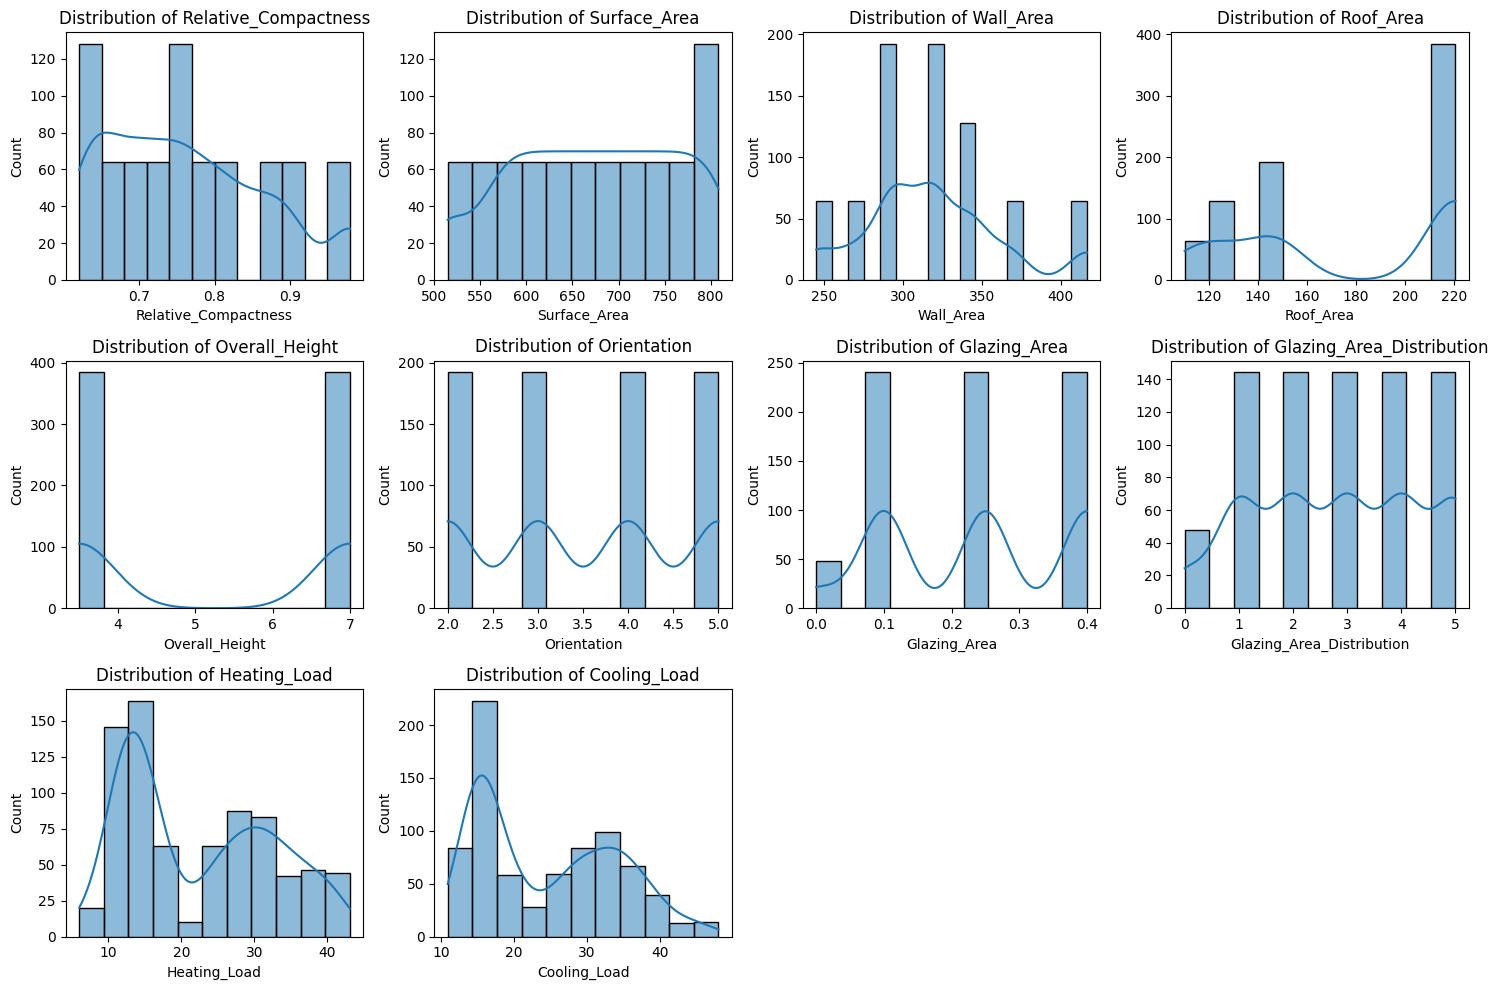

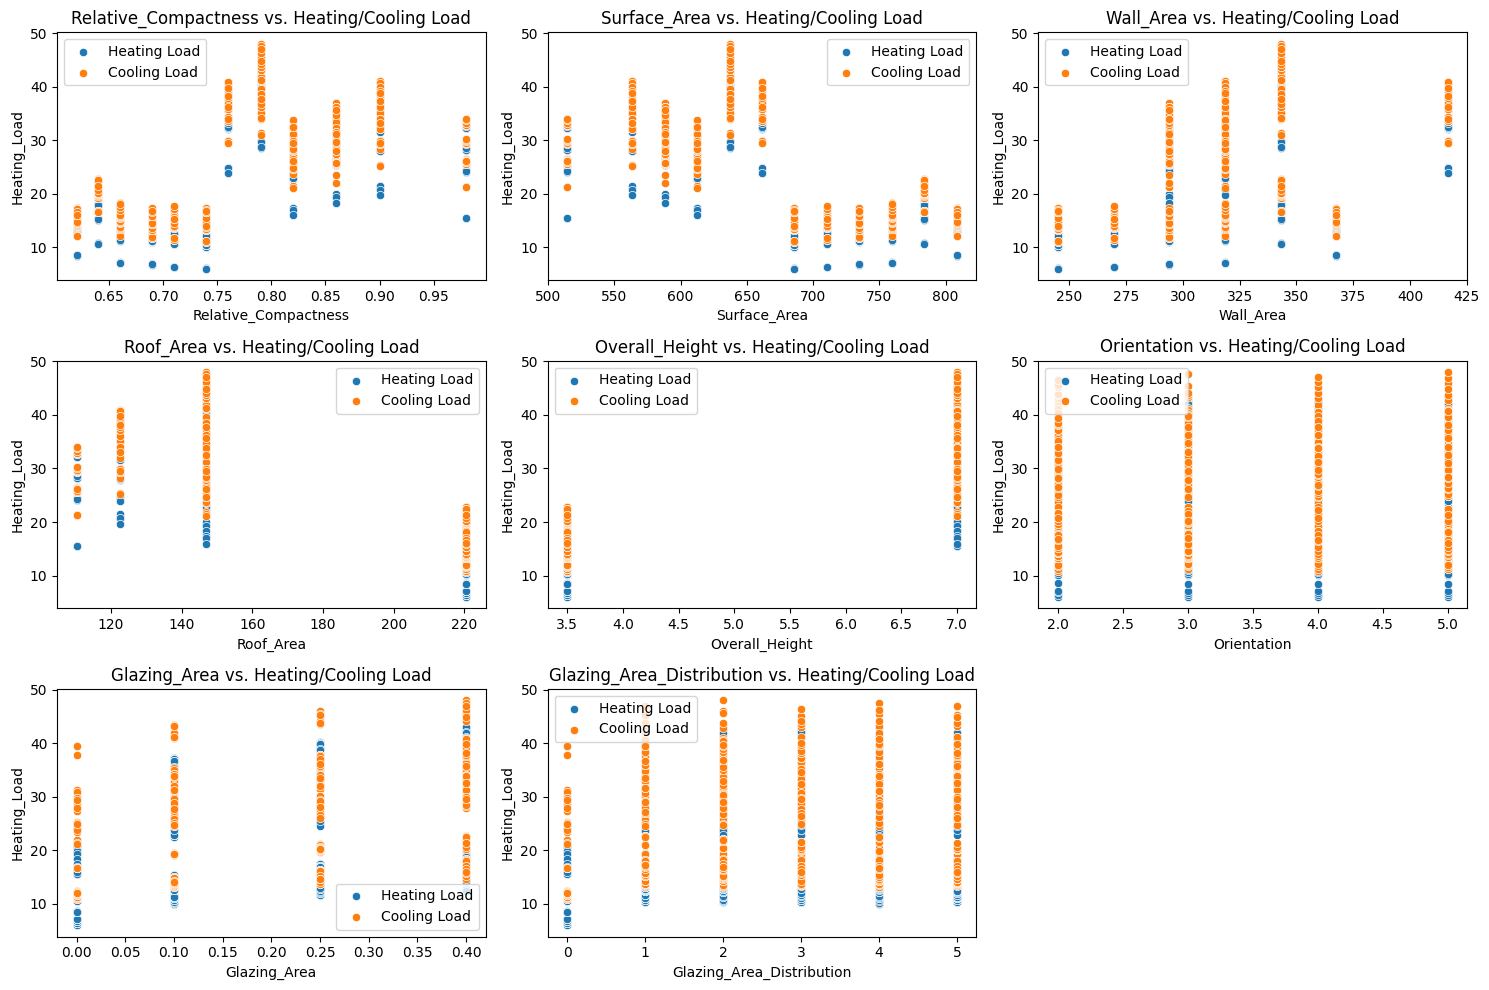

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [8]:
# Visualize the distribution of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.select_dtypes(include=np.number).columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Visualize the relationship between numerical features and target variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.select_dtypes(include=np.number).columns[:-2]):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=data[col], y=data['Heating_Load'], label='Heating Load')
    sns.scatterplot(x=data[col], y=data['Cooling_Load'], label='Cooling Load')
    plt.title(f'{col} vs. Heating/Cooling Load')
    plt.legend()
plt.tight_layout()
plt.show()

# Visualize the relationship between categorical features and target variables
plt.figure(figsize=(10, 5))
for i, col in enumerate(data.select_dtypes(include='object').columns):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x=data[col], y=data['Heating_Load'])
    plt.title(f'{col} vs. Heating Load')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
for i, col in enumerate(data.select_dtypes(include='object').columns):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x=data[col], y=data['Cooling_Load'])
    plt.title(f'{col} vs. Cooling Load')
plt.tight_layout()
plt.show()


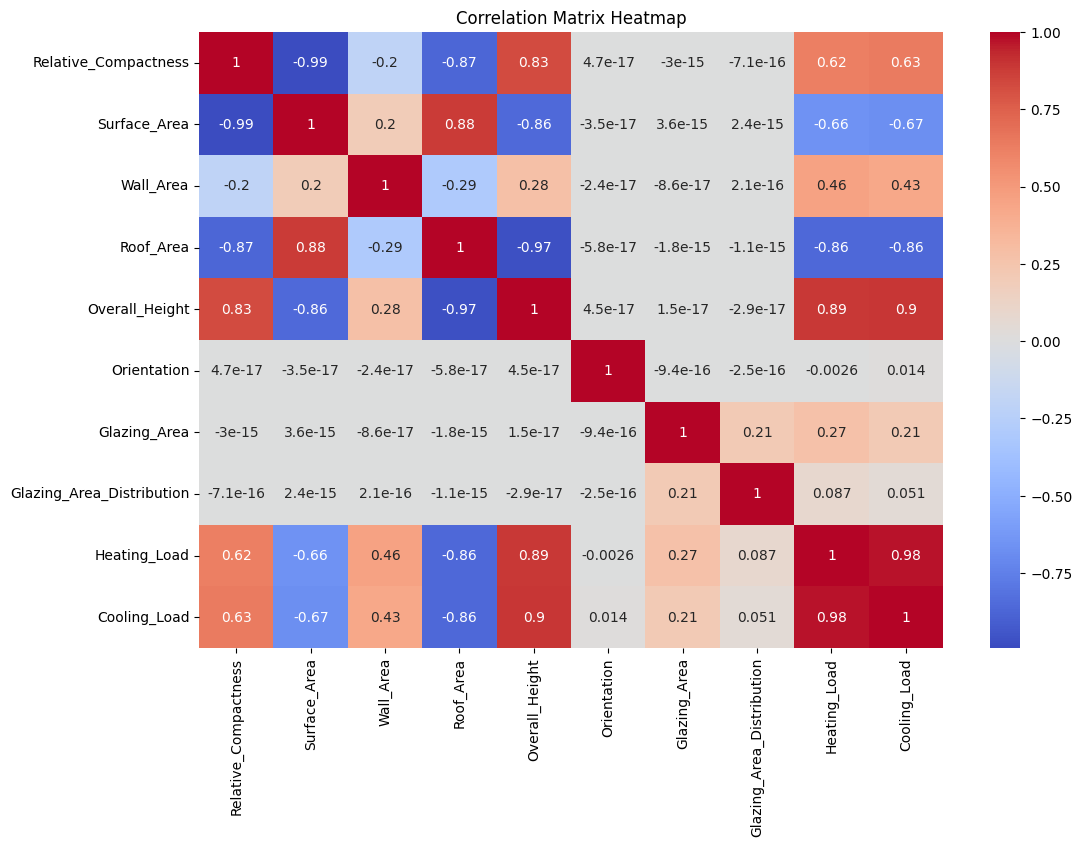

In [9]:

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [10]:

# Define features (X) and target variables (y)
X = data.drop(['Heating_Load', 'Cooling_Load'], axis=1)
y_heating = data['Heating_Load']
y_cooling = data['Cooling_Load']

# Create transformers


# Split data into training and testing sets
X_train, X_test, y_heating_train, y_heating_test = train_test_split(X, y_heating, test_size=0.2, random_state=42)
X_train, X_test, y_cooling_train, y_cooling_test = train_test_split(X, y_cooling, test_size=0.2, random_state=42)


# Initialize and train the XGBoost model for Heating Load
xgb_heating = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_heating.fit(X_train, y_heating_train)

# Make predictions for Heating Load
y_heating_pred = xgb_heating.predict(X_test)


# Initialize and train the XGBoost model for Cooling Load
xgb_cooling = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_cooling.fit(X_train, y_cooling_train)

# Make predictions for Cooling Load
y_cooling_pred = xgb_cooling.predict(X_test)


# Evaluate the models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, r2, mae

mse_heating, r2_heating, mae_heating = evaluate_model(y_heating_test, y_heating_pred)
mse_cooling, r2_cooling, mae_cooling = evaluate_model(y_cooling_test, y_cooling_pred)

print(f"Heating Load Model Evaluation:")
print(f"- MSE: {mse_heating:.4f}")
print(f"- R-squared: {r2_heating:.4f}")
print(f"- MAE: {mae_heating:.4f}")

print(f"\nCooling Load Model Evaluation:")
print(f"- MSE: {mse_cooling:.4f}")
print(f"- R-squared: {r2_cooling:.4f}")
print(f"- MAE: {mae_cooling:.4f}")

Heating Load Model Evaluation:
- MSE: 0.1659
- R-squared: 0.9984
- MAE: 0.2636

Cooling Load Model Evaluation:
- MSE: 0.7367
- R-squared: 0.9920
- MAE: 0.4486


In [11]:
# Create a directory to store the models if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save the models
joblib.dump(xgb_heating, 'models/xgb_heating_model.pkl')
joblib.dump(xgb_cooling, 'models/xgb_cooling_model.pkl')

print("Models saved successfully!")

Models saved successfully!


In [12]:
# Load the saved models
xgb_heating_loaded = joblib.load('models/xgb_heating_model.pkl')
xgb_cooling_loaded = joblib.load('models/xgb_cooling_model.pkl')

# Create a new record (replace with your actual data)
new_record = pd.DataFrame({
    'Relative_Compactness': [0.74],
    'Surface_Area': [638.9],
    'Wall_Area': [318.5],
    'Roof_Area': [170.7],
    'Overall_Height': [7.0],
    'Orientation': [2],
    'Glazing_Area': [0.1],
    'Glazing_Area_Distribution': [1]
})

# Make predictions using the loaded models
new_heating_pred = xgb_heating_loaded.predict(new_record)
new_cooling_pred = xgb_cooling_loaded.predict(new_record)

print(f"Predicted Heating Load for the new record: {new_heating_pred[0]:.2f}")
print(f"Predicted Cooling Load for the new record: {new_cooling_pred[0]:.2f}")

Predicted Heating Load for the new record: 10.33
Predicted Cooling Load for the new record: 13.53
